# An introduction to Groundwater Modeling
## Part 1. One-dimensional flow
### Authors: Neeltje A. Augustinus (5404916) & Milan L. Moleman (5415764)

<img src="figs/part_of_cover_bakker_post.png" width="800px"> 

In [11]:
# Before starting we need to import NumPy and Matplotlib and set some defaults
import numpy as np
import matplotlib.pyplot as plt
# and set some parameters to make the figures look good
plt.rcParams["figure.autolayout"] = True # same as tight_layout after every plot
plt.rcParams["figure.figsize"] = (9, 3.5) # set default figure size
plt.rcParams["contour.negative_linestyle"] = 'solid' # set default line style
plt.rc('font', size=12)

# Steady one-dimensional flow
Solutions are presented for one-dimensional steady Dupuit flow, where the head is a function of the horizontal coordinate $x$ only. The head in the aquifer does not vary in the vertical direction within an aquifer. The vertical component of flow within an aquifer is computed from continuity of flow by neglecting the resistance to flow in the vertical direction (the Dupuit-Forchheimer approximation). 

The governing differential equation for groundwater flow is obtained by combining a fluid mass balance (or volume balance if the groundwater has a constant density) with Darcy's law. This course deals with exact solutions for groundwater flow problems. In mathematical terms: exact solutions to the differential equation and stated boundary conditions. The exact solution for the head is a function of the spatial coordinates ($x$ or $x$ and $y$) and time $t$ (for transient flow). Alternatively, approximate solutions may be obtained with numerical techniques (not part of this course) where the flow domain is divided in, e.g., rectangles or triangles.  

The procedure of deriving a differential equation and obtaining an exact solution is illustrated for the case of steady one-dimensional flow in an aquifer of constant transmissivity. The volume balance for groundwater for steady flow is

\begin{equation}
\text{Volume in} - \text{Volume out} = 0
\end{equation}

The volume balance for steady one-dimensional groundwater flow in an aquifer is derived by considering a small part of an aquifer that is $\Delta x$ long and $\Delta y=1$ wide in the direction normal to the plane of flow. Inflow consists of horizontal flow from the left, $Q_x(x)$, and recharge at the top, $N$ [L/T]. Outflow consists of horizontal flow at the right, $Q_x(x+\Delta x)$ (see Figure). The discharge vector $Q_x$ is the discharge per unit width of aquifer so the dimensions are L$^2$/T, while the recharge is the discharge per unit area with dimensions L/T.

<IMG src="figs/merged_nbs1_4_0.png" width=400>

Substitution of the appropriate volumes in the volume balance gives
\begin{equation}
Q_x(x,t)\Delta t + N\Delta x \Delta t - Q_x(x+\Delta x,t)\Delta t = 0
\end{equation}
Division by $\Delta x$ and rearrangement of terms gives
\begin{equation}
\frac{Q_x(x + \Delta x, t) - Q_x(x, t)}{\Delta x} = N
\end{equation}
In the limit for $\Delta x \to 0$ this gives the differential form of the continuity equation for steady one-dimensional horizontal flow
\begin{equation}
\frac{\text{d}  Q_x}{\text{d}  x} = N
\end{equation}
When transmissivity is assumed constant and the Dupuit-Forcheimer approximation is adopted (so that the head is approximated as constant in the vertical direction) horizontal flow is distributed equally over the aquifer thickness $H$ so that the discharge vector $Q_x$, the integrated specific discharge over the thickness of the aquifer, may be written as
\begin{equation}
Q_x=Hq_x=-T\frac{\text{d}h}{\text{d}x}
\end{equation}
where $T=kH$ is the transmissivity of the aquifer and $q_x$ is given by Darcy's law
\begin{equation}
q_x = -k\frac{\text{d} h}{\text{d}  x} 
\end{equation}
Recall that the average velocity $v_x$ in the aquifer is computed from $q_x$ through division by the porosity $n$
\begin{equation}
    v_x = q_x / n
\end{equation}

Substitution of the expression for $Q_x$ in the continuity equation gives
\begin{equation}
\frac{\text{d}}{\text{d}x}\left(T\frac{\text{d}h}{\text{d}x}\right)=-N
\end{equation}
When the transmissivity $T$ can be approximated as constant, the differential equation simplifies to
\begin{equation}
\frac{\text{d}^2h}{\text{d}x^2}=-\frac{N}{T}
\end{equation}
This is a second order, linear, ordinary differential equation known as the Poisson equation. 
The general solution is obtained by integration (twice), which gives, for the case that $N$ is constant
\begin{equation}
h=-\frac{N}{2T}x^2 + Ax +B
\end{equation}
where $A$ and $B$ are integration constants that need to be determined from boundary conditions.

# Solution 1. Steady recharge between two rivers

Consider an aquifer bounded on the left and right sides by two long parallel rivers that fully penetrate the aquifer. The rivers are a distance $L$ apart and in direct hydraulic contact (i.e., no entry resistance) with the aquifer so that the boundary conditions are
\begin{equation}
h\vert_{x=0} = h_0
\end{equation}
\begin{equation}
h\vert_{x=L} = h_L
\end{equation}

<img src="figs/merged_nbs1_29_0.png" width=400> 

With these boundary conditions the solution for the head becomes
\begin{equation}
h=-\frac{N}{2T}(x^2 - Lx) + \frac{(h_L-h_0)x}{L} + h_0
\end{equation}
The solution for the discharge vector is obtained by differentiating this equation and multiplying the result by $-T$ (i.e. applying Darcy's law)
\begin{equation}
Q_x = -T\frac{\text{d}h}{\text{d}x} = N\left(x  - \frac{L}{2}\right) - T\frac{h_L-h_0}{L}
\end{equation}

In [12]:
# parameters
L = 1000 # aquifer length, m
H = 10 # saturated thickness, m
zb = -5 # aquifer bottom, m
k = 10 # hydraulic conductivity, m/d
n = 0.3 # porosity, -
T = k * H # transmissivity, m^2/d
h0 = 6 # specified head at the left boundary, m
hL = 4 # specified head at the right boundary, m
N = 0.001  # areal recharge, m/d

In [13]:
# solution
x = np.linspace(0, L, 100)
h = -N / (2 * T) * (x ** 2 - L * x) + (hL - h0) * x / L + h0

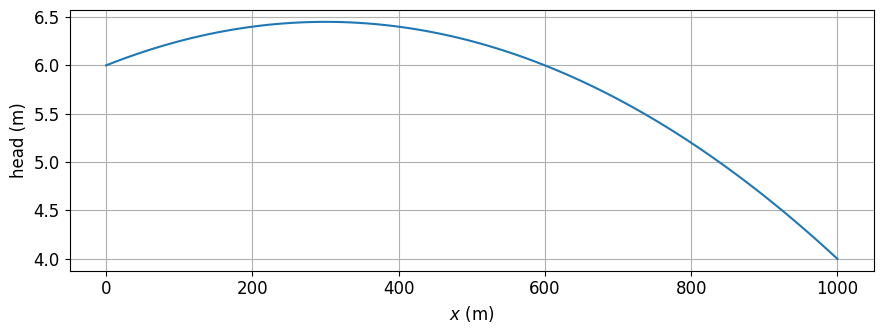

In [14]:
# plot
plt.plot(x, h)
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('head (m)');

### Exercise 1

Enter the Python code to calculate the discharge vector $Q_x$ in the code cell below. Then plot $Q_x$ as a function of $x$ and print to the screen how much groundwater discharges into the left river and how much into the right river.

Text(0, 0.5, '$Q_x$ (m$^3$/d)')

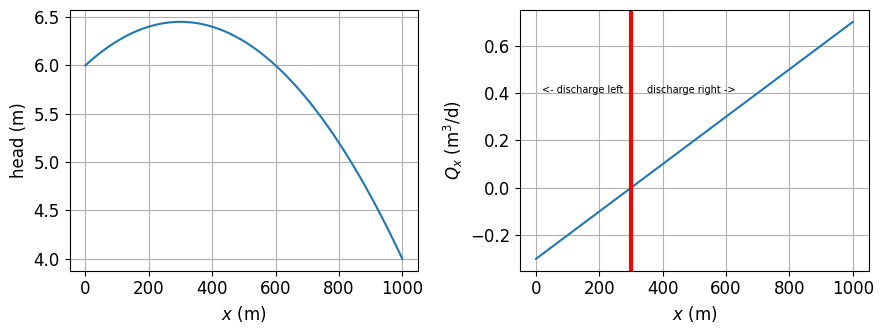

In [15]:
plt.subplot(121)
plt.plot(x, h)
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('head (m)')
plt.subplot(122)
Q = N * (x - L/2) - T * (hL - h0)/L
plt.plot(x, Q)
plt.grid()
plt.axvline(300, color='red', lw=3);
plt.text(20, 0.4, '<- discharge left', fontsize=7);
plt.text(350, 0.4, 'discharge right ->', fontsize=7);
plt.xlabel('$x$ (m)')
plt.ylabel('$Q_x$ (m$^3$/d)')

### Exercise 2
Consider the case that $h_0 = h_L = 10$ m. The head halfway between the two rivers is measured to be 11 m. Compute $N$ for this case using the parameters of the example above. Plot $h$ vs. $x$ and $Q_x$ vs. $x$. 

In [16]:
# parameters
L = 1000 # aquifer length, m
H = 11 # saturated thickness, m
zb = -5 # aquifer bottom, m
k = 10 # hydraulic conductivity, m/d
n = 0.3 # porosity, -
T = k * H # transmissivity, m^2/d
h0 = 10 # specified head at the left boundary, m
hL = 10 # specified head at the right boundary, m
x = 500

In [17]:
N = 2 * T * (H - (((hL - h0) * x) / L) - h0) / (-1 * (x**2 - L * x))

In [18]:
print(f"The areal discharge equals: {N} m/d")

The areal discharge equals: 0.00088 m/d


In [19]:
x = np.linspace(0, L, 100)
h = -N / (2 * T) * (x ** 2 - L * x) + (hL - h0) * x / L + h0
Q = N * (x - L/2) - T * (hL - h0)/L

Text(0, 0.5, '$Q_x$ (m$^3$/d)')

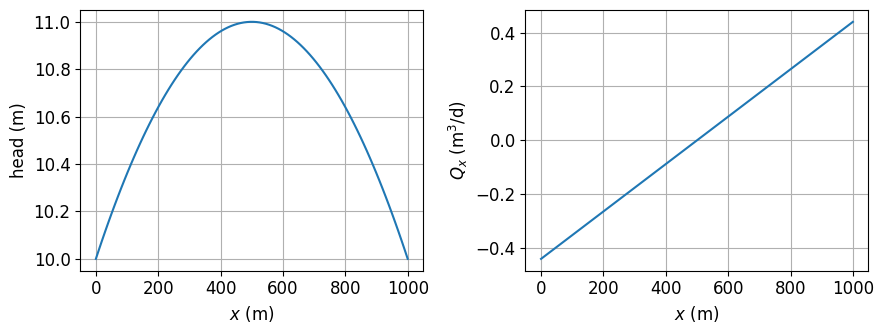

In [20]:
plt.subplot(121)
plt.plot(x, h)
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('head (m)')

plt.subplot(122)
plt.plot(x, Q)
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('$Q_x$ (m$^3$/d)')

## Travel time

The travel time for water that enters at the top of the aquifer and exits at the left or right river can be computed from the horizontal component of the velocity vector $v_x=q_x/n$ (since $v_x$ is not a function of the vertical coordinate). The travel time $t_\text{tr}(x_0, x_1)$  from location $x=x_0$ to location $x=x_1$ is

\begin{equation}
t_\text{tr}(x_0, x_1) = \frac{nH}{N} \ln\left[\frac{v_x|_{x=x_1}}{ v_x|_{x=x_0}}\right] =
\frac{nH}{N} \ln\left[\frac{
N\left(x_1  - \frac{L}{2}\right) - T(h_L-h_0)/L}
{N\left(x_0  - \frac{L}{2}\right) - T(h_L-h_0)/L}\right]
\end{equation}

### Exercise 3
Compute how long it takes for water that enters the aquifer at $x=500$ m at the top of the aquifer to flow to the right river. Use the same parameters as for the original flow problem (so $h_0 = 6$ m, $h_L = 4$ m and $N = 0.001$ m/d).

In [21]:
# parameters
L = 1000 # aquifer length, m
H = 10 # saturated thickness, m
zb = -5 # aquifer bottom, m
k = 10 # hydraulic conductivity, m/d
n = 0.3 # porosity, -
T = k * H # transmissivity, m^2/d
h0 = 6 # specified head at the left boundary, m
hL = 4 # specified head at the right boundary, m
N = 0.001  # areal recharge, m/d

x0 = 500 # location x0, m
x1 = L # location x1, m

In [22]:
t = ((n * H)/N) * np.log(((N * (x1 - (L/2))) - ((T * (hL - h0))/L))/((N * (x0 - (L/2))) - ((T * (hL - h0))/L)))

In [23]:
print(f"The travel time for water that enters the acquifer at x = 500m and flows to the right equals: {t:.2f} days")

The travel time for water that enters the acquifer at x = 500m and flows to the right equals: 3758.29 days


# Solution 2. Steady outflow into a lake with a leaky bottom

When an aquifer is covered by a leaky layer, the vertical flow across the aquifer top boundary can be specified as a Robin or type 3 boundary condition. With this boundary condition, the vertical flow $q_z$ depends on the head difference across the leaky layer, and the leaky layer's (vertical) hydraulic conductivity $k^*$ and thickness $H^*$. This can be expressed as
\begin{equation}
q_z = k^* \frac{h - h^*}{H^*} = \frac{h-h^*}{c}
\end{equation}
where $c$ is the resistance
\begin{equation}
c=\frac{H^*}{k^*}
\end{equation}
The dimension of the resistance $c$ is days.

<img src="figs/ex2_def.png" width=800> 

The differential equation that is obtained by combining continuity of flow and Darcy's law is 
\begin{equation}
\frac{\text{d}^2(h-h^*)}{\text{d}x^2} = \frac{h-h^*}{\lambda^2}
\end{equation}
where 
\begin{equation}
\lambda=\sqrt{cT}
\end{equation}
is referred to as the leakage factor [L]. This differential equation is a second order, linear, homogeneous, ordinary differential equation known as the modified-Helmholtz equation.


## Problem definition
<img src="figs/semiconf.png" width=400> 

Differential equation:
\begin{equation}
\frac{\text{d}^2h}{\text{d}x^2} = 0 \qquad x\le 0
\end{equation}
\begin{equation}
\frac{\text{d}^2h}{\text{d}x^2} = \frac{h - h_L}{\lambda^2} \qquad x\ge 0
\end{equation}
where $\lambda$ is the leakage factor (with dimension length)
\begin{equation}
\lambda = \sqrt{kHc}
\end{equation}
Boundary conditions:
\begin{equation}
x\to -\infty \qquad Q_x=U
\end{equation}
\begin{equation}
x\to \infty \qquad h=h_L
\end{equation}

Solution:
\begin{equation}
h=-\frac{U}{kH}(x - \lambda) + h_L  \qquad x\le 0
\end{equation}

\begin{equation}
h=\frac{U\lambda}{kH}\exp\left(\frac{-x}{\lambda}\right) + h_L \qquad x\ge 0
\end{equation}

In [24]:
# parameters
k = 2 # hydraulic conductivity m/d
H = 10 # saturated thickness, m
U = 0.02 # flow to lake, m^2/d
hL = 20 # head in lake, m
c = 100 # resistance, d
lab = np.sqrt(k * H * c) # leakage factor, m
print(f'leakage factor lambda: {lab:.2f} m')

leakage factor lambda: 44.72 m


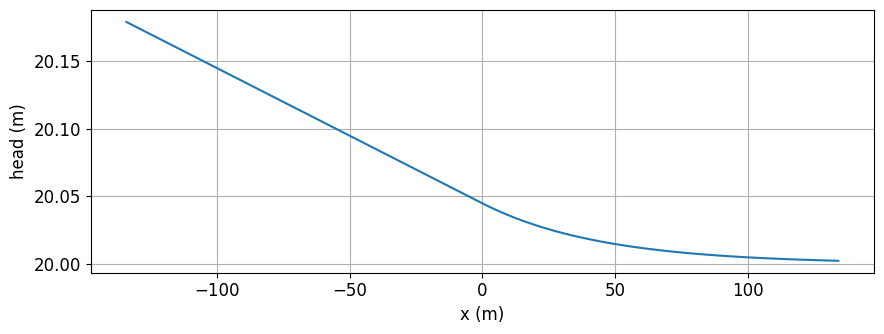

In [25]:
# solution
def head(x, k=k, H=H, U=U, hL=hL, lab=lab):
    if x < 0:
        h = -U / (k * H) * (x - lab) + hL
    else:
        h = U * lab / (k * H) * np.exp(-x / lab) + hL
    return h
        
headvec = np.vectorize(head)

x = np.linspace(-3 * lab, 3 * lab, 100)
h = headvec(x)
plt.plot(x, h)
plt.xlabel('x (m)')
plt.ylabel('head (m)')
plt.grid()

### Exercise 4
Compute $U$ such that the head at $x=-500$ m is 1 m above the level of the lake.

\begin{equation}
-\frac{U}{kH}(-500 - \lambda) + h_L = h_L + 1
\end{equation}

\begin{equation}
U = \frac{kH}{500 + \lambda}
\end{equation}

In [26]:
U = (k * H) / (500 + lab)
print(f"The flow to the lake equals {U:.4f} m^2/d")

The flow to the lake equals 0.0367 m^2/d


# Transient one-dimensional flow

Consider one-dimensional transient flow, which means that the head and flow are a function of $x$ and time $t$, respectively. As for steady flow, the starting point of the derivation of the differential equation is the volume balance for a small piece of the aquifer
\begin{equation}
\text{Volume in} - \text{Volume out} = \text{Increase in volume}
\end{equation}
Recall from the previous session that the inflow consists of horizontal flow from the left, $Q_x(x, t)$ [L$^2$/T], and recharge at the top, $N$ [L/T] and that outflow consists of horizontal flow at the right, $Q_x(x+\Delta x, t)$ (see Figure). 

<IMG src="figs/merged_nbs5_4_0.png"  width=400>> 

Unlike for steady flow, the change in storage within the volume is no longer zero. The increase in storage equals the increase in head multiplied by the storage coefficient $S$, so
\begin{equation}
Q_x(x,t)\Delta t + N\Delta x \Delta t - Q_x(x+\Delta x,t)\Delta t =
S\Delta x[h(x, t + \Delta t) - h(x, t)]
\end{equation}
Division by $\Delta x \Delta t$ and rearrangement of terms gives
\begin{equation}
\frac{Q_x(x + \Delta x, t) - Q_x(x, t)}{\Delta x}
= -S \frac{h(x, t + \Delta t) - h(x, t)}{\Delta t} + N
\end{equation}
In the limit for $\Delta x \to 0$ and $\Delta t \to 0$ the volume balance turns into the differential equation for one-dimensional horizontal transient flow
\begin{equation}
\frac{\partial Q_x}{\partial x} = - S\frac{\partial h}{\partial t} + N
\end{equation}

Substitution of $Q_x = -T\tfrac{\partial h}{\partial x}$ gives
\begin{equation} 
\frac{\partial^2 h}{\partial x^2} = \frac{S}{T} \frac{\partial h}{\partial t} - \frac{N}{T}
\end{equation}
The term $T/S$ is also referred to as the aquifer diffusivity.

# Solution 3. Riverbank storage

## Problem definition
The figure below shows an aquifer bounded on the left by a fully penetrating canal or river that is in direct hydraulic contact with the aquifer. Towards the right, the aquifer has an infinite extent in the $x$ direction. Initially, the head in the aquifer is equal to the canal level $h_0$ everywhere. At time $t=t_0$, the stage in the canal is raised by an amount $\Delta h$. It is further assumed that the head change does not extend indefintively inland, so $h|_{x\to\infty, t\ge 0} = h_0$.

<img src="figs/fig5.1.png" width=400> 

The solution for the head under these conditions is
\begin{equation}
h(x, t) = \Delta h \, \text{erfc}(u) + h_0 {\hskip 2em} t>t_0
\end{equation}
where 
\begin{equation}
u = \sqrt{\frac{Sx^2}{4T(t-t_0)}}
\end{equation}
and erfc is the complimentary error function
\begin{equation}
\text{erfc}(u) = \int_u^\infty \frac{2}{\sqrt{\pi}} \text{e}^{-\tau^2}\text{d}\tau
\end{equation}
The solution for the discharge vector is
\begin{equation}
Q_x= T\Delta h \frac{2u}{x\sqrt{\pi}} \text{e}^{-u^2} {\hskip 2em} t>t_0
\end{equation}

In [27]:
# parameters
T = 100 # transmissivity, m^2/d
S = 0.2 # storage coefficient, -
delh = 2 # change in river level, m
t0 = 0 # time of change in river level, d
h0 = 0 # starting head

In [28]:
# solution
from scipy.special import erfc

# Function for the head
def head(x, t, T, S, delh=1, t0=0):
    u = np.sqrt(S * x ** 2 / (4 * T * (t - t0)))
    return delh * erfc(u)

# Function for the discharge vector
def disvec(x, t, T, S, delh, t0=0):
    u = np.sqrt(S * x ** 2 / (4 * T * (t - t0)))
    return T * delh * 2 * u / (x * np.sqrt(np.pi)) * np.exp(-u ** 2) 

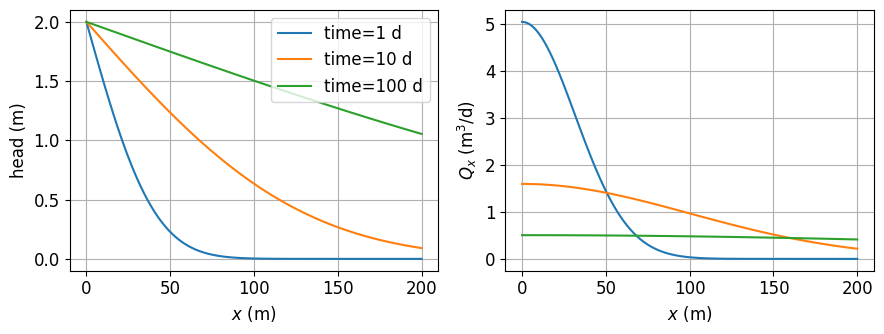

In [29]:
# plot
x = np.linspace(1e-12, 200, 100)
plt.subplot(121)
for t in [1, 10, 100]:
    h = head(x, t, T, S, delh, t0) + h0
    plt.plot(x, h, label=f'time={t} d')
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('head (m)')
plt.legend()
plt.subplot(122)
for t in [1, 10, 100]:
    Qx = disvec(x, t, T, S, delh, t0)
    plt.plot(x, Qx, label=f'time={t} d')
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('$Q_x$ (m$^3$/d)');

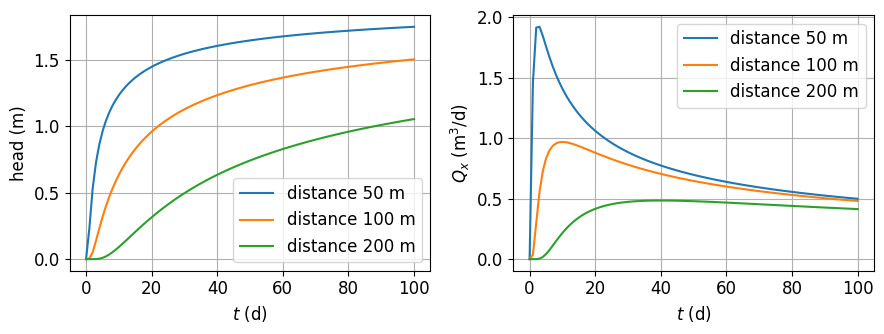

In [30]:
# basic plot head and Qx vs t
t = np.linspace(1e-12, 100, 100)
plt.subplot(121)
for x in [50, 100, 200]:
    h = head(x, t, T, S, delh, t0)
    plt.plot(t, h, label=f'distance {x} m')
plt.grid()
plt.xlabel('$t$ (d)')
plt.ylabel('head (m)')    
plt.legend()
plt.subplot(122)
for x in [50, 100, 200]:
    Qx = disvec(x, t, T, S, delh, t0)
    plt.plot(t, Qx, label=f'distance {x} m')
plt.grid()
plt.xlabel('$t$ (d)')
plt.ylabel('$Q_x$ (m$^3$/d)');    
plt.legend();

### Water balance

The total inflow $Q_{in}$ from the canal into the aquifer over a period $\Delta t$  may be computed through integration of the discharge vector
\begin{equation}
Q_{in} = \int_{t_0}^{t_0+\Delta t} Q_x|_{x=0,t} = 2 \Delta h \sqrt{\frac{ST \Delta t}{\pi}}
\end{equation}
The total inflow must be equal to the total increase in storage. 
The total increase in storage may be computed through numerical integration of the transient head in the aquifer at $t=\Delta t$ and multiplication by the storage coefficient. The integation may be carried out, for example, by using the `quad` method of `scipy.integrate`. The `quad` function returns a number of items of which the first one is the computed integral.

In [31]:
t = 10 # time period for which water balance is checked
Qin = 2 * delh * np.sqrt(S * T * t / (np.pi)) # from equation
from scipy.integrate import quad
stored = S * quad(head, 1e-12, np.infty, args=(t, T, S, delh, 0))[0]
print(f'total inflow from canal  : {Qin:.6f} m^3')
print(f'total increase in storage: {stored:.6f} m^3')

total inflow from canal  : 31.915382 m^3
total increase in storage: 31.915382 m^3


### Exercise 5
Plot the increase in groundwater storage as a function of time between $t = 1$ and $t = 100$ d. Why does the volume keep increasing?

In [32]:
t = np.linspace(0, 100, 100)
Qin = 2 * delh * np.sqrt(S * T * t / (np.pi))

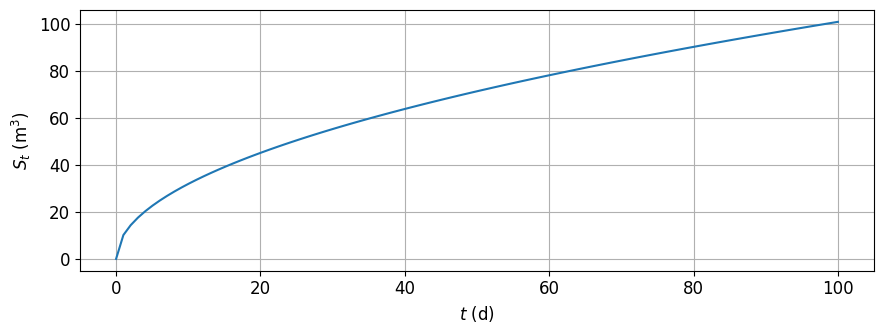

In [33]:
plt.plot(t, Qin)
plt.grid()
plt.xlabel('$t$ (d)')
plt.ylabel('$S_t$ (m$^3$)');

As can be seen in the graph, the storage keeps increasing over time. Interestingly, due to the smaller discharge of water in the aquifer as well as the lower gradient of the inflow over time, the storage keeps increasing over time for a long period. The increase will flatten over time, yet for the first 100 days the increase is still significant.